In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./insulin-training_Aditya.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   32 non-null     int64  
 1   weight                32 non-null     int64  
 2   blood glucoseLevel    32 non-null     int64  
 3   carbohydr ate
Intake  32 non-null     int64  
 4   timeof theday         32 non-null     object 
 5   exercise              32 non-null     int64  
 6   insulin dosage        32 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ KB


In [4]:
df.head()

,age,weight,blood glucoseLevel,carbohydr ate\nIntake,timeof theday,exercise,insulin dosage
0,25,70,90,45,Morning,30,5.1
1,30,85,150,60,Afternoon,45,12.3
2,28,80,120,50,Evening,25,8.5
3,35,90,180,70,Morning,60,15.0
4,40,75,160,55,Afternoon,40,10.5


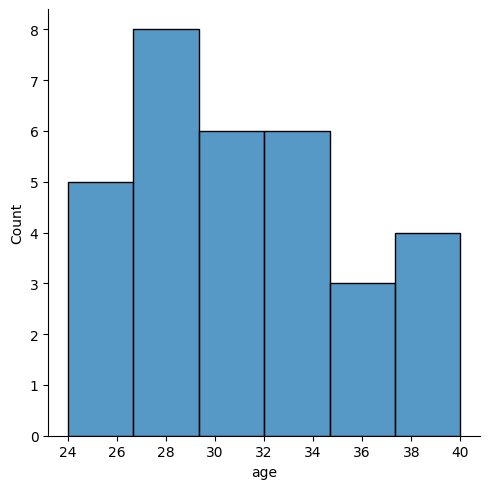

In [5]:
sns.displot(df['age'])

Distribution of Age

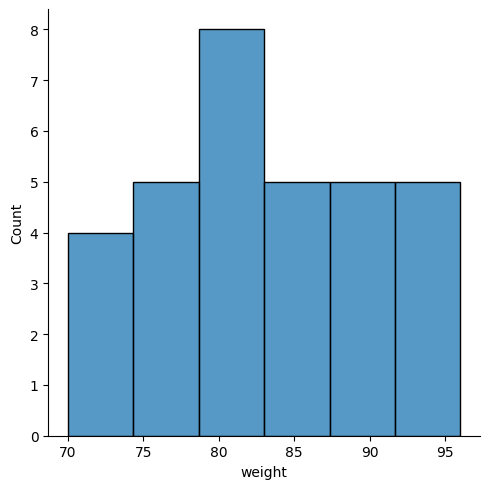

In [6]:
sns.displot(df['weight'])

Distribution of weight

<Axes: xlabel='age', ylabel='insulin dosage'>

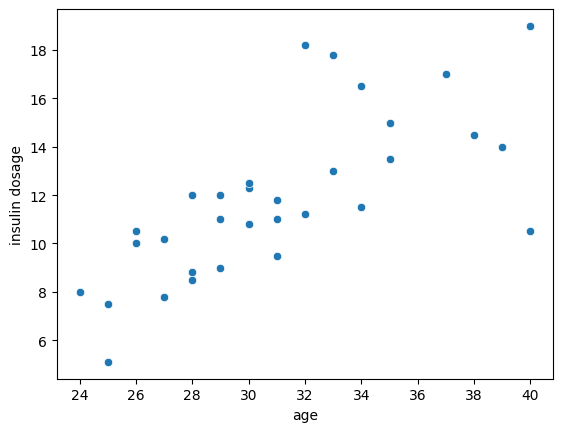

In [7]:
sns.scatterplot(data=df,x='age',y='insulin dosage')

Insulin dosage with respect to age

<Axes: xlabel='weight', ylabel='insulin dosage'>

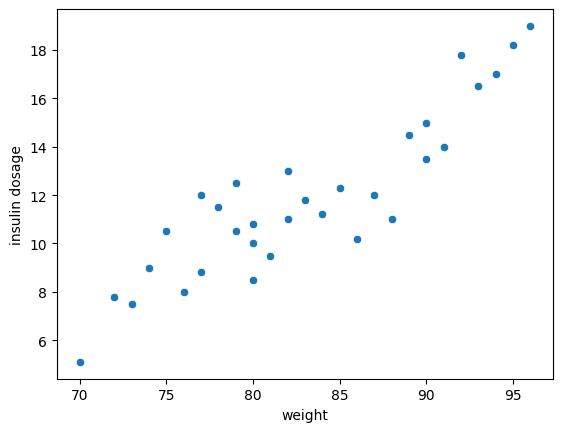

In [8]:
sns.scatterplot(data=df,x='weight',y='insulin dosage')

Insulin Dosage with respect to weight

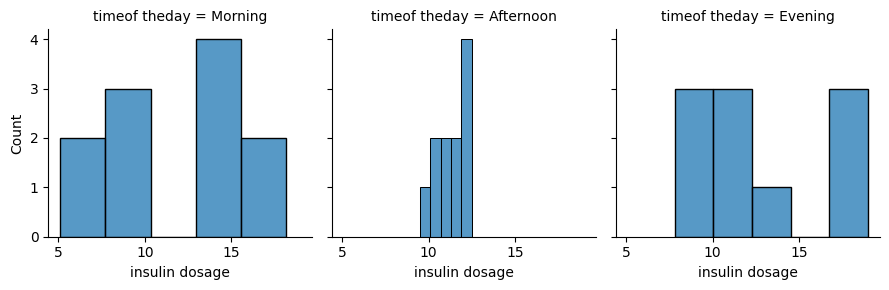

In [9]:
g = sns.FacetGrid(df, col="timeof theday")
g.map(sns.histplot, "insulin dosage")

Insulin Dosage range with respect to time of the day

<Axes: xlabel='blood glucoseLevel', ylabel='insulin dosage'>

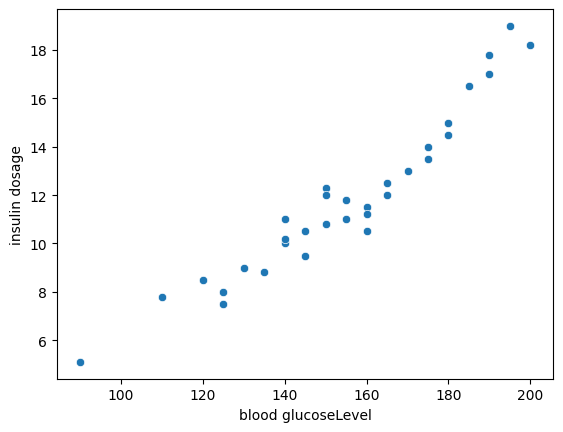

In [10]:
sns.scatterplot(data=df,x='blood glucoseLevel',y='insulin dosage')

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
time = pd.get_dummies(df['timeof theday'],drop_first=True)
df.drop('timeof theday',axis=1,inplace=True)
df = pd.concat([df,time],axis=1)

In [13]:
df.head()

,age,weight,blood glucoseLevel,carbohydr ate\nIntake,exercise,insulin dosage,Evening,Morning
0,25,70,90,45,30,5.1,0,1
1,30,85,150,60,45,12.3,0,0
2,28,80,120,50,25,8.5,1,0
3,35,90,180,70,60,15.0,0,1
4,40,75,160,55,40,10.5,0,0


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [15]:
X_train,y_train = (df.drop('insulin dosage',axis=1),df['insulin dosage'])

### Linear Regression

In [16]:
linear = GridSearchCV(LinearRegression(),param_grid={},cv=4)

In [17]:
linear.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=LinearRegression(), param_grid={})

In [18]:
pd.DataFrame(linear.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002,0.000705,0.00125,0.000435,{},0.964366,0.956987,0.954524,0.958951,0.958707,0.003624,1


### Support Vector Regressor

In [19]:
svr = GridSearchCV(SVR(kernel='linear'),param_grid={'gamma':['scale','auto']},cv=4)

In [20]:
svr.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SVR(kernel='linear'),
             param_grid={'gamma': ['scale', 'auto']})

In [21]:
pd.DataFrame(svr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008260,0.003568,0.001498,0.000502,scale,{'gamma': 'scale'},0.956958,0.920042,0.96321,0.939384,0.944898,0.0168,1
1,0.008001,0.003674,0.001005,0.000012,auto,{'gamma': 'auto'},0.956958,0.920042,0.96321,0.939384,0.944898,0.0168,1


### Random Forest Regressor

In [22]:
rfr = GridSearchCV(RandomForestRegressor(),param_grid={'n_estimators':[25,50,100,200]},cv=4)

In [23]:
rfr.fit(X_train,y_train)
pd.DataFrame(rfr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019011,0.001888,0.001999,4.219739e-06,25,{'n_estimators': 25},0.882542,0.967250,0.931736,0.921884,0.925853,0.030166,4
1,0.033753,0.000435,0.002248,4.328866e-04,50,{'n_estimators': 50},0.893832,0.990928,0.932771,0.902837,0.930092,0.037967,1
2,0.066743,0.000828,0.003749,4.328096e-04,100,{'n_estimators': 100},0.894942,0.992560,0.924202,0.896199,0.926976,0.039631,3
3,0.138008,0.002111,0.006000,8.513246e-07,200,{'n_estimators': 200},0.891025,0.993816,0.924855,0.907233,0.929232,0.039160,2


### Gradient Boosting Regressor

In [24]:
gbr = GridSearchCV(GradientBoostingRegressor(),param_grid={'n_estimators':[25,50,100,200]},cv=4)

In [25]:
gbr.fit(X_train,y_train)
pd.DataFrame(gbr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010250,0.000434,0.001251,0.000433,25,{'n_estimators': 25},0.892161,0.961449,0.912206,0.902214,0.917008,0.026619,4
1,0.016749,0.000433,0.001251,0.000433,50,{'n_estimators': 50},0.909407,0.973621,0.935578,0.913312,0.932979,0.025500,1
2,0.033009,0.000720,0.001241,0.000415,100,{'n_estimators': 100},0.917650,0.955510,0.935922,0.912125,0.930302,0.017011,2
3,0.064012,0.001222,0.001496,0.000507,200,{'n_estimators': 200},0.918033,0.946480,0.937682,0.904654,0.926712,0.016378,3


### Conclusion

After training and testing all the models we can conclude that Linear Regression yields the best results with an average accuracy of 95.7%.

In [30]:
import joblib

In [28]:
model = LinearRegression()
model.fit(df.drop('insulin dosage',axis=1),df['insulin dosage'])

LinearRegression()

In [31]:
joblib.dump(model,'./InsulinPredictor.pkl')

['./InsulinPredictor.pkl']